In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('../data/perfumes_df_ready.csv')

In [3]:
data.shape

(4478, 105)

In [4]:
pd.set_option('max_columns', 110)

In [5]:
data.head(2)

,perfume_name,designer,group,all_notes,top_notes,middle_notes,base_notes,synopsis,overall_rating,total_num_voters,gender,longvity_poor,longvity_weak,longvity_moderate,longvity_long_lasting,longvity_very_long_lasting,sillage_soft,sillage_moderate,sillage_heavy,sillage_enormous,have_it,had_it,want_it,my_signature,love_it,like_it,dislike_it,spring,summer,fall,day,night,main_accords,salty,smoky,Unnamed: 35,coconut,white floral,fresh spicy,white wine,vanilla,warm spicy,whiskey,ginger,conifer,caramel,woody,vinyl,tropical,musk,fruity,coca cola,powdery,floral,aromatic,milky,yellow floral,nutty,cacao,aquatic,camphor,red fruits,sweet,oud,almond,animalic,gourmand,rum,sand,citrus,beeswax,musky,watery,soft spicy,vodka,tobacco,fresh,tonka coumarin,savory,violet,aldehydic,rose,terpenic,cinnamon,tuberose,sour,cherry,lactonic,herbal,narcotic,ozonic,patchouli,leather,woodsy notes,not found,honey,soapy,metallic,green,bitter,balsamic,marine,earthy,amber,coffee
0,Eau de Soleil Blanc Tom Ford for women and men,Tom Ford,Oriental Floral,"['Bitter Orange', 'Bergamot', 'Petitgrain', 'C...","['Bitter Orange', 'Bergamot', 'Petitgrain', 'C...","['Tunisian Orange Blossom', 'Jasmine', 'Tubero...","['Coconut', 'Amber', 'Vanilla', 'Tonka Bean', ...",Eau De Soleil Blanc\n \n ...,4.11,410.0,women and men,14,25,35,14,12,47,34,20,31,279,40,272,3,100,74,26,3,20,54,5,56,"{'citrus': '130', 'white floral': '119', 'coco...",0.0,0.0,0.0,80.0,119.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,130.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Narciso Rodriguez for Him Narciso Rodriguez fo...,Narciso Rodriguez,Aromatic Fougere,"['Violet Leaf', 'Patchouli', 'Amber', 'Musk']",not found,not found,not found,The male fragrance from Narciso Rodriguez and ...,3.94,2311.0,Him Narciso Rodriguez,33,39,173,402,97,87,285,366,111,2021,638,1252,64,100,70,37,55,41,12,58,41,"{'ozonic': '130', 'musky': '120', 'patchouli':...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130.0,111.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.0,0.0


In [6]:
data['gender'].value_counts().head()

women               2551
men                  886
women and men        884
Men Burberry          10
Men Calvin Klein       6
Name: gender, dtype: int64

In [7]:
# cleaning up the gender column in data
gender = []
for k in data['perfume_name']:
    gender.append(k.split('for')[1].lower().strip())
    

for n, k in enumerate(gender):
    if ('her' in k[:4]) or ('women' in k[:]) and ('women and men' not in k):
        gender[n]='women'
    elif ('him' in k[:4]) or ('men' in k[:4]):
        gender[n] = 'men'
    elif ('women and men' in k):
        gender[n] = 'women and men'
    else:
        gender[n] = 'unknown'

In [8]:
# replace the old with the new
data['gender'] = gender

In [9]:
data['gender'].value_counts()

women            2610
men               974
women and men     884
unknown            10
Name: gender, dtype: int64

<span style='color:navy'> When making this data frame, I filled null values in `overall_rating` and `total_num_voters` with -1, and all the object columns with `'not found'` in place of nulls. </span>

In [10]:
# the data frame of perfumes not having overall rating, that I want to predict
test_df = data.loc[data['overall_rating'] == -1, :]
test_df.drop(['overall_rating'], axis = 1, inplace = True)
test_df.shape

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(34, 104)

In [109]:
# that is what we are going to work with to predict on test_df
df = data.loc[data['overall_rating']!=-1, :]
df.shape

(4444, 105)

In [12]:
data.select_dtypes(include = 'object').columns 

Index(['perfume_name', 'designer', 'group', 'all_notes', 'top_notes',
       'middle_notes', 'base_notes', 'synopsis', 'gender', 'main_accords'],
      dtype='object')

In [13]:
data.select_dtypes(exclude = 'object').columns

Index(['overall_rating', 'total_num_voters', 'longvity_poor', 'longvity_weak',
       'longvity_moderate', 'longvity_long_lasting',
       'longvity_very_long_lasting', 'sillage_soft', 'sillage_moderate',
       'sillage_heavy', 'sillage_enormous', 'have_it', 'had_it', 'want_it',
       'my_signature', 'love_it', 'like_it', 'dislike_it', 'spring', 'summer',
       'fall', 'day', 'night', 'salty', 'smoky', 'Unnamed: 35', 'coconut',
       'white floral', 'fresh spicy', 'white wine', 'vanilla', 'warm spicy',
       'whiskey', 'ginger', 'conifer', 'caramel', 'woody', 'vinyl', 'tropical',
       'musk', 'fruity', 'coca cola', 'powdery', 'floral', 'aromatic', 'milky',
       'yellow floral', 'nutty', 'cacao', 'aquatic', 'camphor', 'red fruits',
       'sweet', 'oud', 'almond', 'animalic', 'gourmand', 'rum', 'sand',
       'citrus', 'beeswax', 'musky', 'watery', 'soft spicy', 'vodka',
       'tobacco', 'fresh', 'tonka  coumarin', 'savory', 'violet', 'aldehydic',
       'rose', 'terpenic', 'c

In [15]:
data.isnull().sum().to_frame().T

,perfume_name,designer,group,all_notes,top_notes,middle_notes,base_notes,synopsis,overall_rating,total_num_voters,gender,longvity_poor,longvity_weak,longvity_moderate,longvity_long_lasting,longvity_very_long_lasting,sillage_soft,sillage_moderate,sillage_heavy,sillage_enormous,have_it,had_it,want_it,my_signature,love_it,like_it,dislike_it,spring,summer,fall,day,night,main_accords,salty,smoky,Unnamed: 35,coconut,white floral,fresh spicy,white wine,vanilla,warm spicy,whiskey,ginger,conifer,caramel,woody,vinyl,tropical,musk,fruity,coca cola,powdery,floral,aromatic,milky,yellow floral,nutty,cacao,aquatic,camphor,red fruits,sweet,oud,almond,animalic,gourmand,rum,sand,citrus,beeswax,musky,watery,soft spicy,vodka,tobacco,fresh,tonka coumarin,savory,violet,aldehydic,rose,terpenic,cinnamon,tuberose,sour,cherry,lactonic,herbal,narcotic,ozonic,patchouli,leather,woodsy notes,not found,honey,soapy,metallic,green,bitter,balsamic,marine,earthy,amber,coffee
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<span style='color:navy'> About the data frame so far: <br />
    Null values in object columns are filled with 'not found'. Null values in numeric columns are filled with -1 <br />
    The gender column needed cleaning because it wasn't parsed correctly before saving it to the dataframe </span>

## <span style='color:navy'> EDA </span>

In [16]:
# #for quick, detailed overview of our variables:
# import pandas_profiling
# pandas_profiling.ProfileReport(df) # gives very large output, better save it to html like so:
# pfr = pandas_profiling.ProfileReport(df)
# pfr.to_file("/tmp/example.html")
# # https://nbviewer.jupyter.org/github/JosPolfliet/pandas-profiling/blob/master/examples/meteorites.ipynb

In [17]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [18]:
# How is every fragrance group is liked, on average? From most liked, to least liked
df.groupby('group').mean()['overall_rating'].sort_values(ascending = False).to_frame(name = 'average ratings')

,average ratings
group,
Chypre,4.221944
Woody Chypre,4.143500
Oriental,4.140840
Leather,4.104717
Oriental Woody,4.056603
Oriental Spicy,4.043694
Woody Spicy,4.031170
Woody,4.027755
Oriental Floral,4.012351


In [19]:
# it is worth noting that not all groups are represented equally. 
# perfumers tend to make much more floral varieties
df['group'].value_counts()

Floral                    635
Floral Fruity             526
Oriental Floral           502
Floral Woody Musk         266
Oriental Woody            262
Woody Aromatic            194
Citrus Aromatic           172
Chypre Floral             172
Woody Spicy               171
Floral Green              142
Oriental                  119
not found                 112
Oriental Spicy            111
Oriental Vanilla          111
Aromatic Fougere           91
Floral Fruity Gourmand     81
Woody Floral Musk          66
Floral Aldehyde            65
Aromatic                   61
Floral Aquatic             58
Oriental Fougere           55
Leather                    53
Aromatic Fruity            49
Woody                      49
Aromatic Aquatic           47
Chypre Fruity              44
Woody Aquatic              44
Woody Chypre               40
Chypre                     36
Aromatic Spicy             35
Citrus                     35
Aromatic Green             30
Citrus Gourmand            10
Name: grou

In [20]:
# also that users are not equal in the dataset
df['gender'].value_counts()

women            2589
men               970
women and men     875
unknown            10
Name: gender, dtype: int64

In [21]:
# separating by gender of perfume audience, how are fragrance families (groups) are liked, on average?
def by_gender(df, sex):
    local_df = df.loc[df['gender'] == sex, :]
    
    print(f'Top five most liked fragrance families by {sex}:')
    print(local_df.groupby('group').mean()['overall_rating'].sort_values(ascending = False).head())
    print('---------------------')
    print(f'Least liked five fragrance families by {sex}:')
    print(local_df.groupby('group').mean()['overall_rating'].sort_values(ascending = False).tail())
    print('---------------------')
    print(f'Range between most liked and least liked fragrance family by {sex}:')
    print(local_df.groupby('group').mean()['overall_rating'].max() - 
         local_df.groupby('group').mean()['overall_rating'].min())
    

In [22]:
by_gender(df, 'women')

Top five most liked fragrance families by women:
group
Aromatic Spicy    4.530000
Woody Spicy       4.375000
Woody             4.298333
Chypre            4.292000
Woody Chypre      4.292000
Name: overall_rating, dtype: float64
---------------------
Least liked five fragrance families by women:
group
Citrus            3.782308
Floral Fruity     3.775781
Floral Aquatic    3.763333
not found         3.731887
Woody Aquatic     3.430000
Name: overall_rating, dtype: float64
---------------------
Range between most liked and least liked fragrance family by women:
1.1


In [23]:
by_gender(df, 'men')

Top five most liked fragrance families by men:
group
Chypre Fruity    4.460000
Floral Green     4.273333
Oriental         4.196667
Chypre           4.158125
Leather          4.111000
Name: overall_rating, dtype: float64
---------------------
Least liked five fragrance families by men:
group
Aromatic            3.767037
Aromatic Fruity     3.716667
Citrus              3.586667
Aromatic Spicy      3.550714
Oriental Vanilla    3.530000
Name: overall_rating, dtype: float64
---------------------
Range between most liked and least liked fragrance family by men:
0.9300000000000002


In [24]:
by_gender(df, 'women and men')

Top five most liked fragrance families by women and men:
group
Chypre          4.254000
Woody Chypre    4.214545
Oriental        4.164545
Woody Spicy     4.144500
Woody           4.139412
Name: overall_rating, dtype: float64
---------------------
Least liked five fragrance families by women and men:
group
Aromatic Fougere    3.808333
Floral Aldehyde     3.805000
Aromatic Fruity     3.788750
Aromatic            3.786500
Citrus Gourmand     3.715000
Name: overall_rating, dtype: float64
---------------------
Range between most liked and least liked fragrance family by women and men:
0.5389999999999997


<span style='color:navy'> Counter intuitively, women collectivley didn't generally prefer the floral fragrances, they in fact prefered deeper warmer notes like woody, spicy, and chypre. <br /> 
I was not surprised with the least liked fragrance families by men. <br />
Maybe it is to keep in mind that some women try some men perfumes and like them. </span>

In [25]:
def df_by_group(df):
    
    women = df.loc[df['gender'] == 'women', :].groupby('group').mean()['overall_rating'].to_frame(name = 'women')

    men = df.loc[df['gender'] == 'men', :].groupby('group').mean()['overall_rating'].to_frame(name = 'men')
    unisex = df.loc[df['gender'] == 'women and men', :].groupby('group').mean()['overall_rating'] \
            .to_frame(name = 'women and men')

    return pd.concat([women, men, unisex], axis = 1, sort = False).fillna(0)

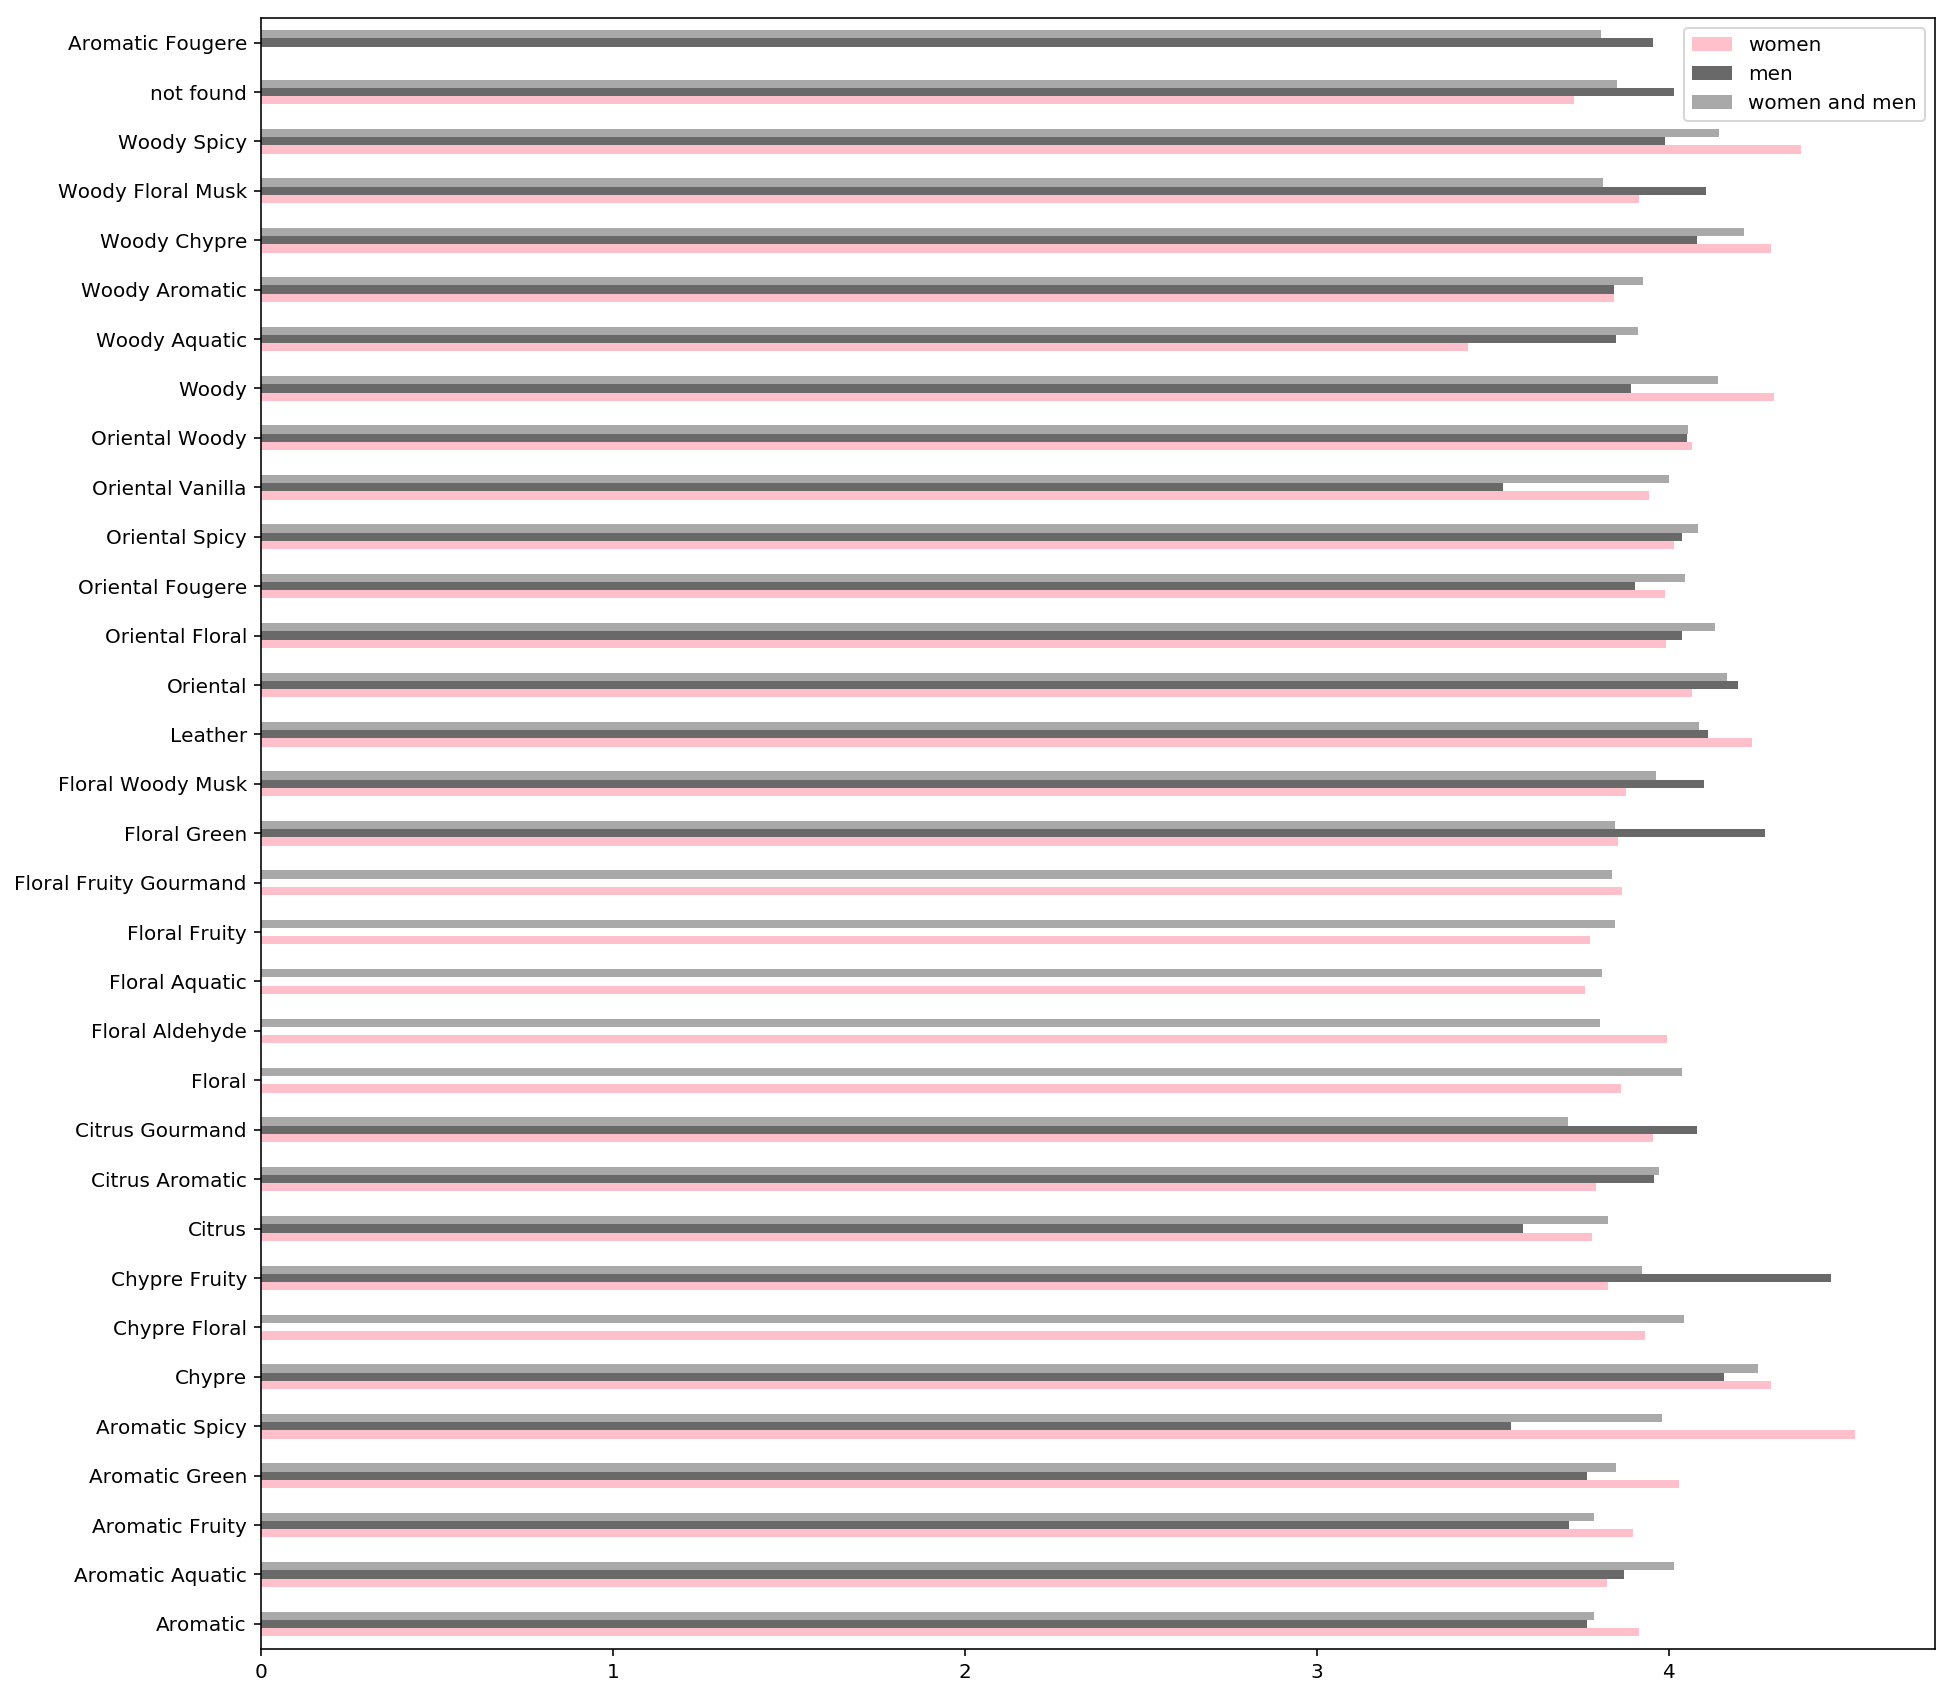

In [26]:
df_by_group(df).plot(kind = 'barh', figsize = (15, 15), width = 0.5, color = ('pink', 'dimgrey', 'darkgrey'));

<span style='color:navy'> Digging deeper might reveal something else... </span>

In [28]:
# what are the fragrance families of those most liked perfumes by each gender
def best_liked_by_gender(df = df, gender = 'women'):
    print(df.loc[(df['gender'] == gender) & (df['overall_rating'] >= 4.5) & \
             (df['total_num_voters'] >= 11),:]['group'].value_counts())
    df.loc[(df['gender'] == gender) & (df['overall_rating'] >= 4.5) & \
             (df['total_num_voters'] >= 11),:]['group'].value_counts().plot(kind = 'barh', figsize = (5,5), 
                                                                           title = f'best liked by {gender}');
    

Oriental Floral           28
Floral                    26
Floral Fruity              8
Floral Aldehyde            7
Floral Woody Musk          7
Oriental                   6
Oriental Woody             4
Floral Green               4
Oriental Spicy             4
Chypre Floral              3
Chypre Fruity              2
Chypre                     2
Woody Chypre               1
Aromatic Spicy             1
Oriental Vanilla           1
Floral Fruity Gourmand     1
Aromatic Fruity            1
Woody                      1
Name: group, dtype: int64


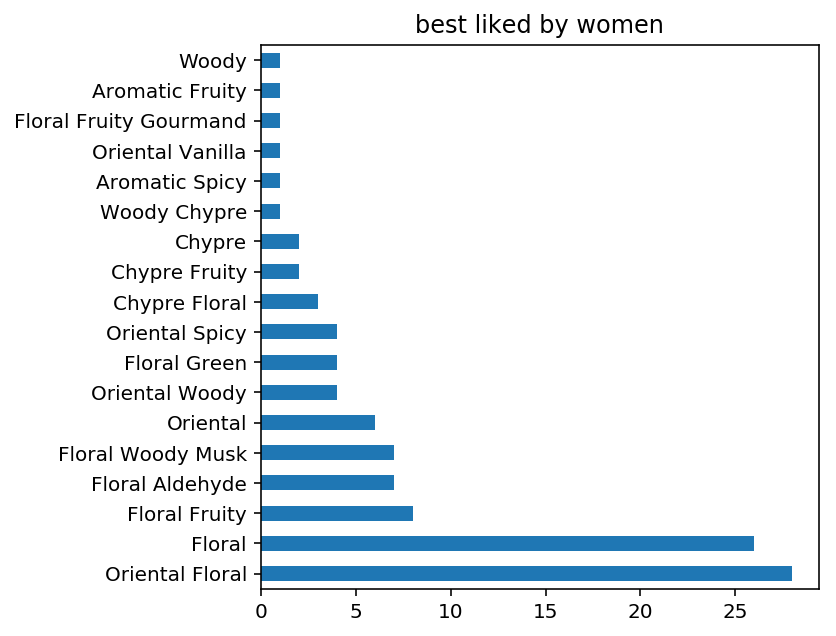

In [30]:
best_liked_by_gender(df = df, gender = 'women')

<span style='color:navy'> This tells us that perfumes scoring average reviews of 4.5 by more than 10 women, are actually floral variations. Followed by oriental, woody, and chypre. </span>

Oriental Woody       11
Woody Spicy           5
Woody Aromatic        4
Aromatic Fougere      3
Woody Floral Musk     3
not found             2
Oriental Floral       1
Citrus Aromatic       1
Chypre                1
Aromatic Aquatic      1
Aromatic Fruity       1
Leather               1
Oriental Spicy        1
Name: group, dtype: int64


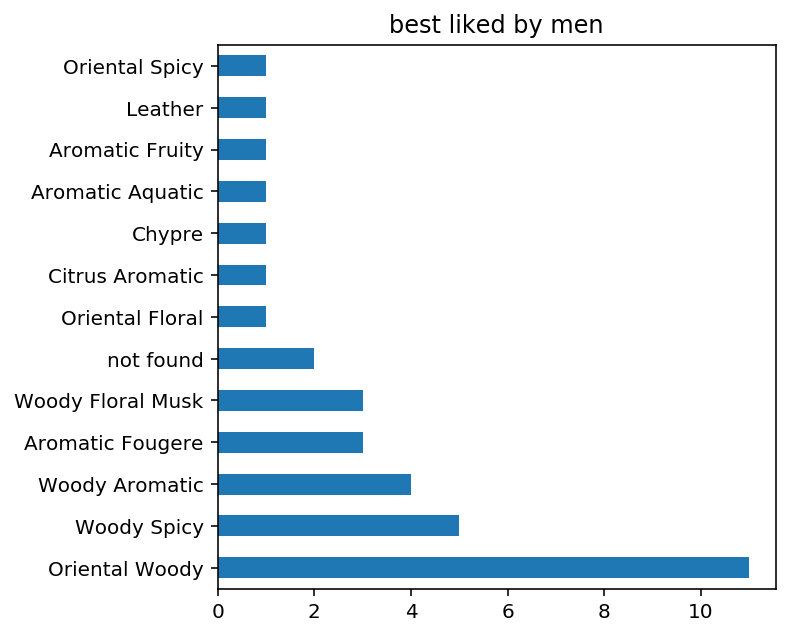

In [31]:
best_liked_by_gender(df = df, gender = 'men')

Oriental Floral      10
Oriental              8
Oriental Woody        6
Floral                5
Woody Spicy           4
not found             3
Leather               3
Chypre                2
Floral Woody Musk     2
Floral Fruity         1
Aromatic              1
Citrus                1
Woody Aromatic        1
Woody                 1
Oriental Fougere      1
Name: group, dtype: int64


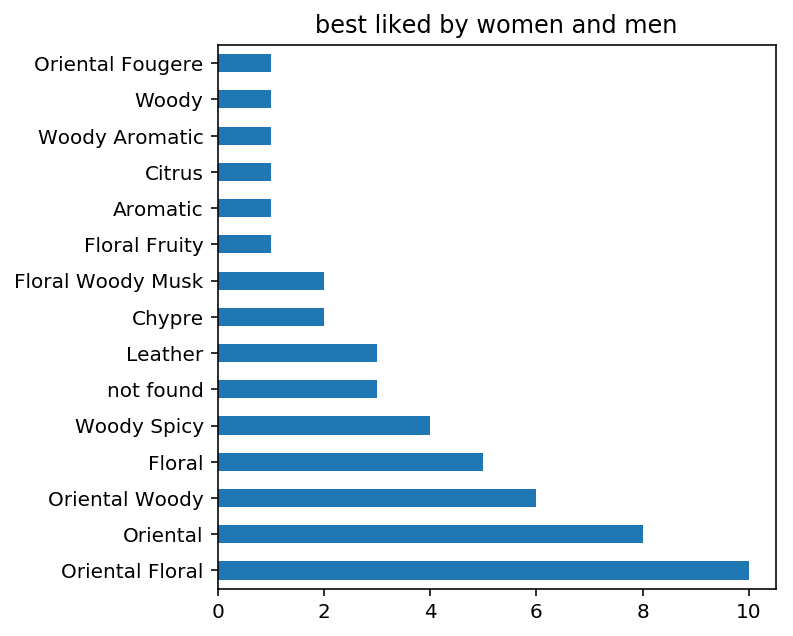

In [32]:
best_liked_by_gender(df = df, gender = 'women and men')

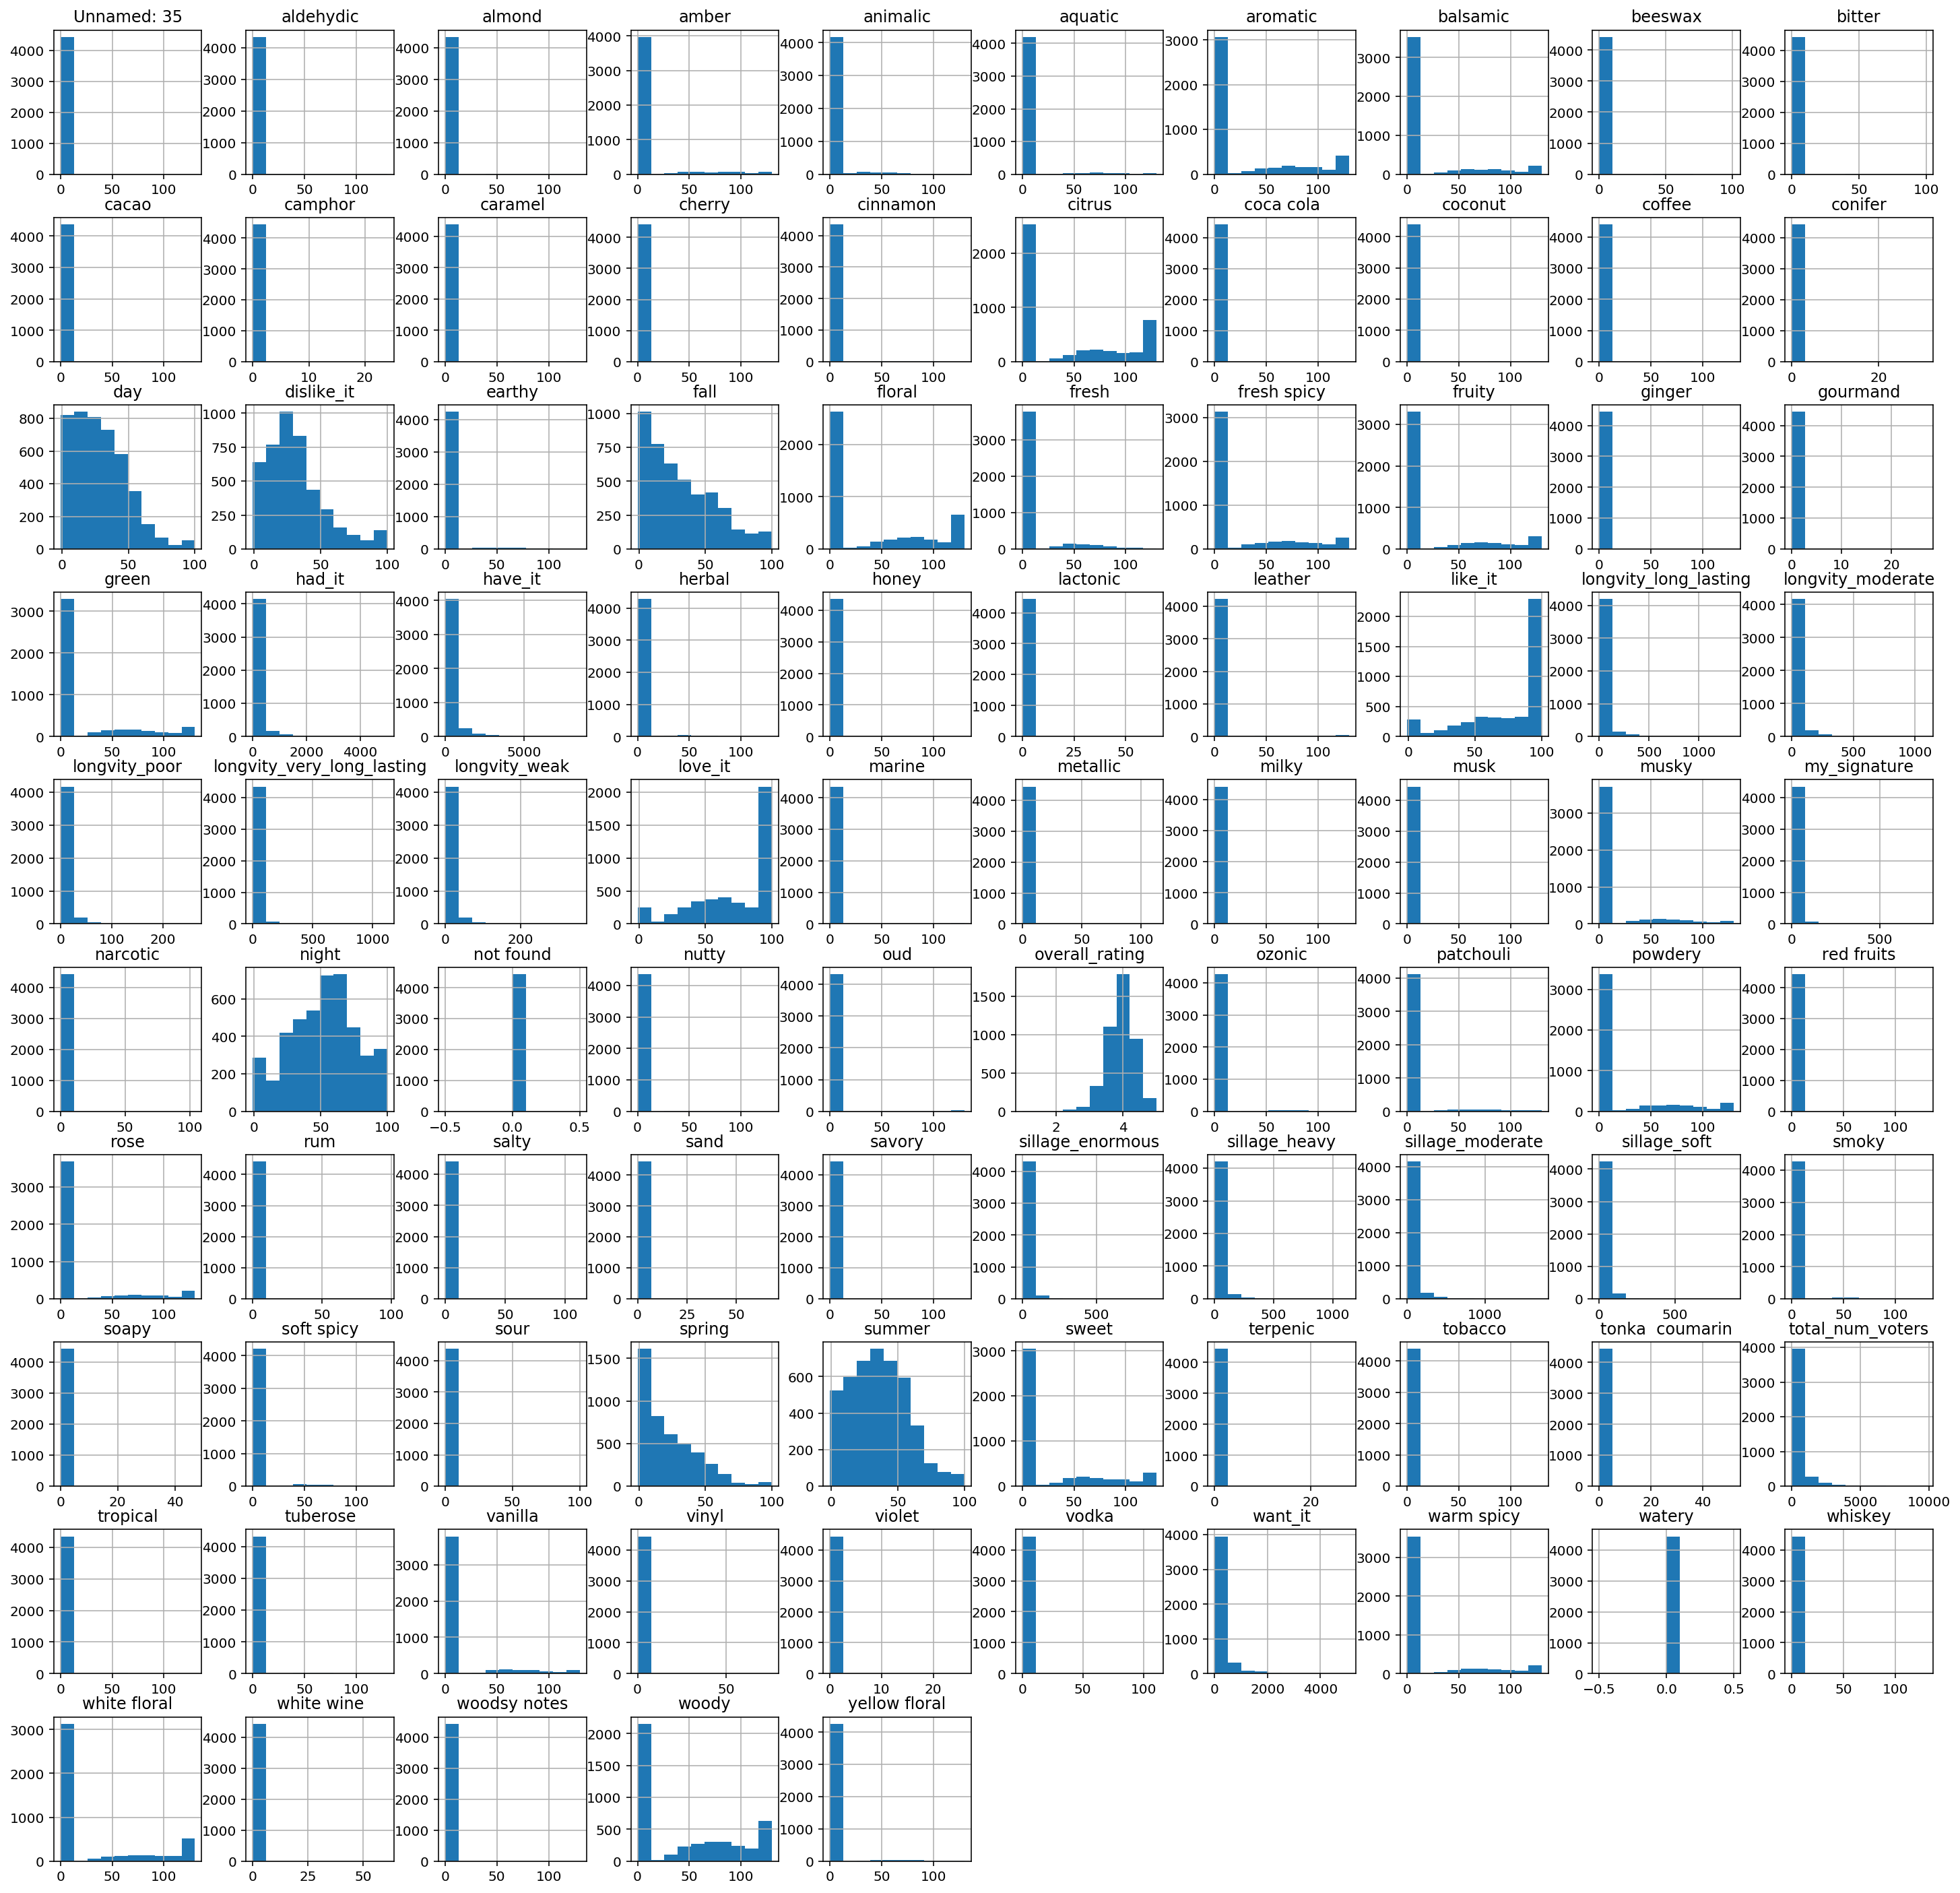

In [34]:
df.hist(figsize = (25, 25));

In [35]:
def make_heat_map(df = df):
    """
    Plots the heatmap of correlations of the given df
    """
    import seaborn as sns
    import numpy as np

    mask = np.zeros_like(df.corr())
    mask[np.triu_indices_from(mask)] = True

    plt.figure(figsize = (25,25))

    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    sns.heatmap(df.corr(), mask = mask, vmin = -1, vmax = 1, cmap = cmap); 

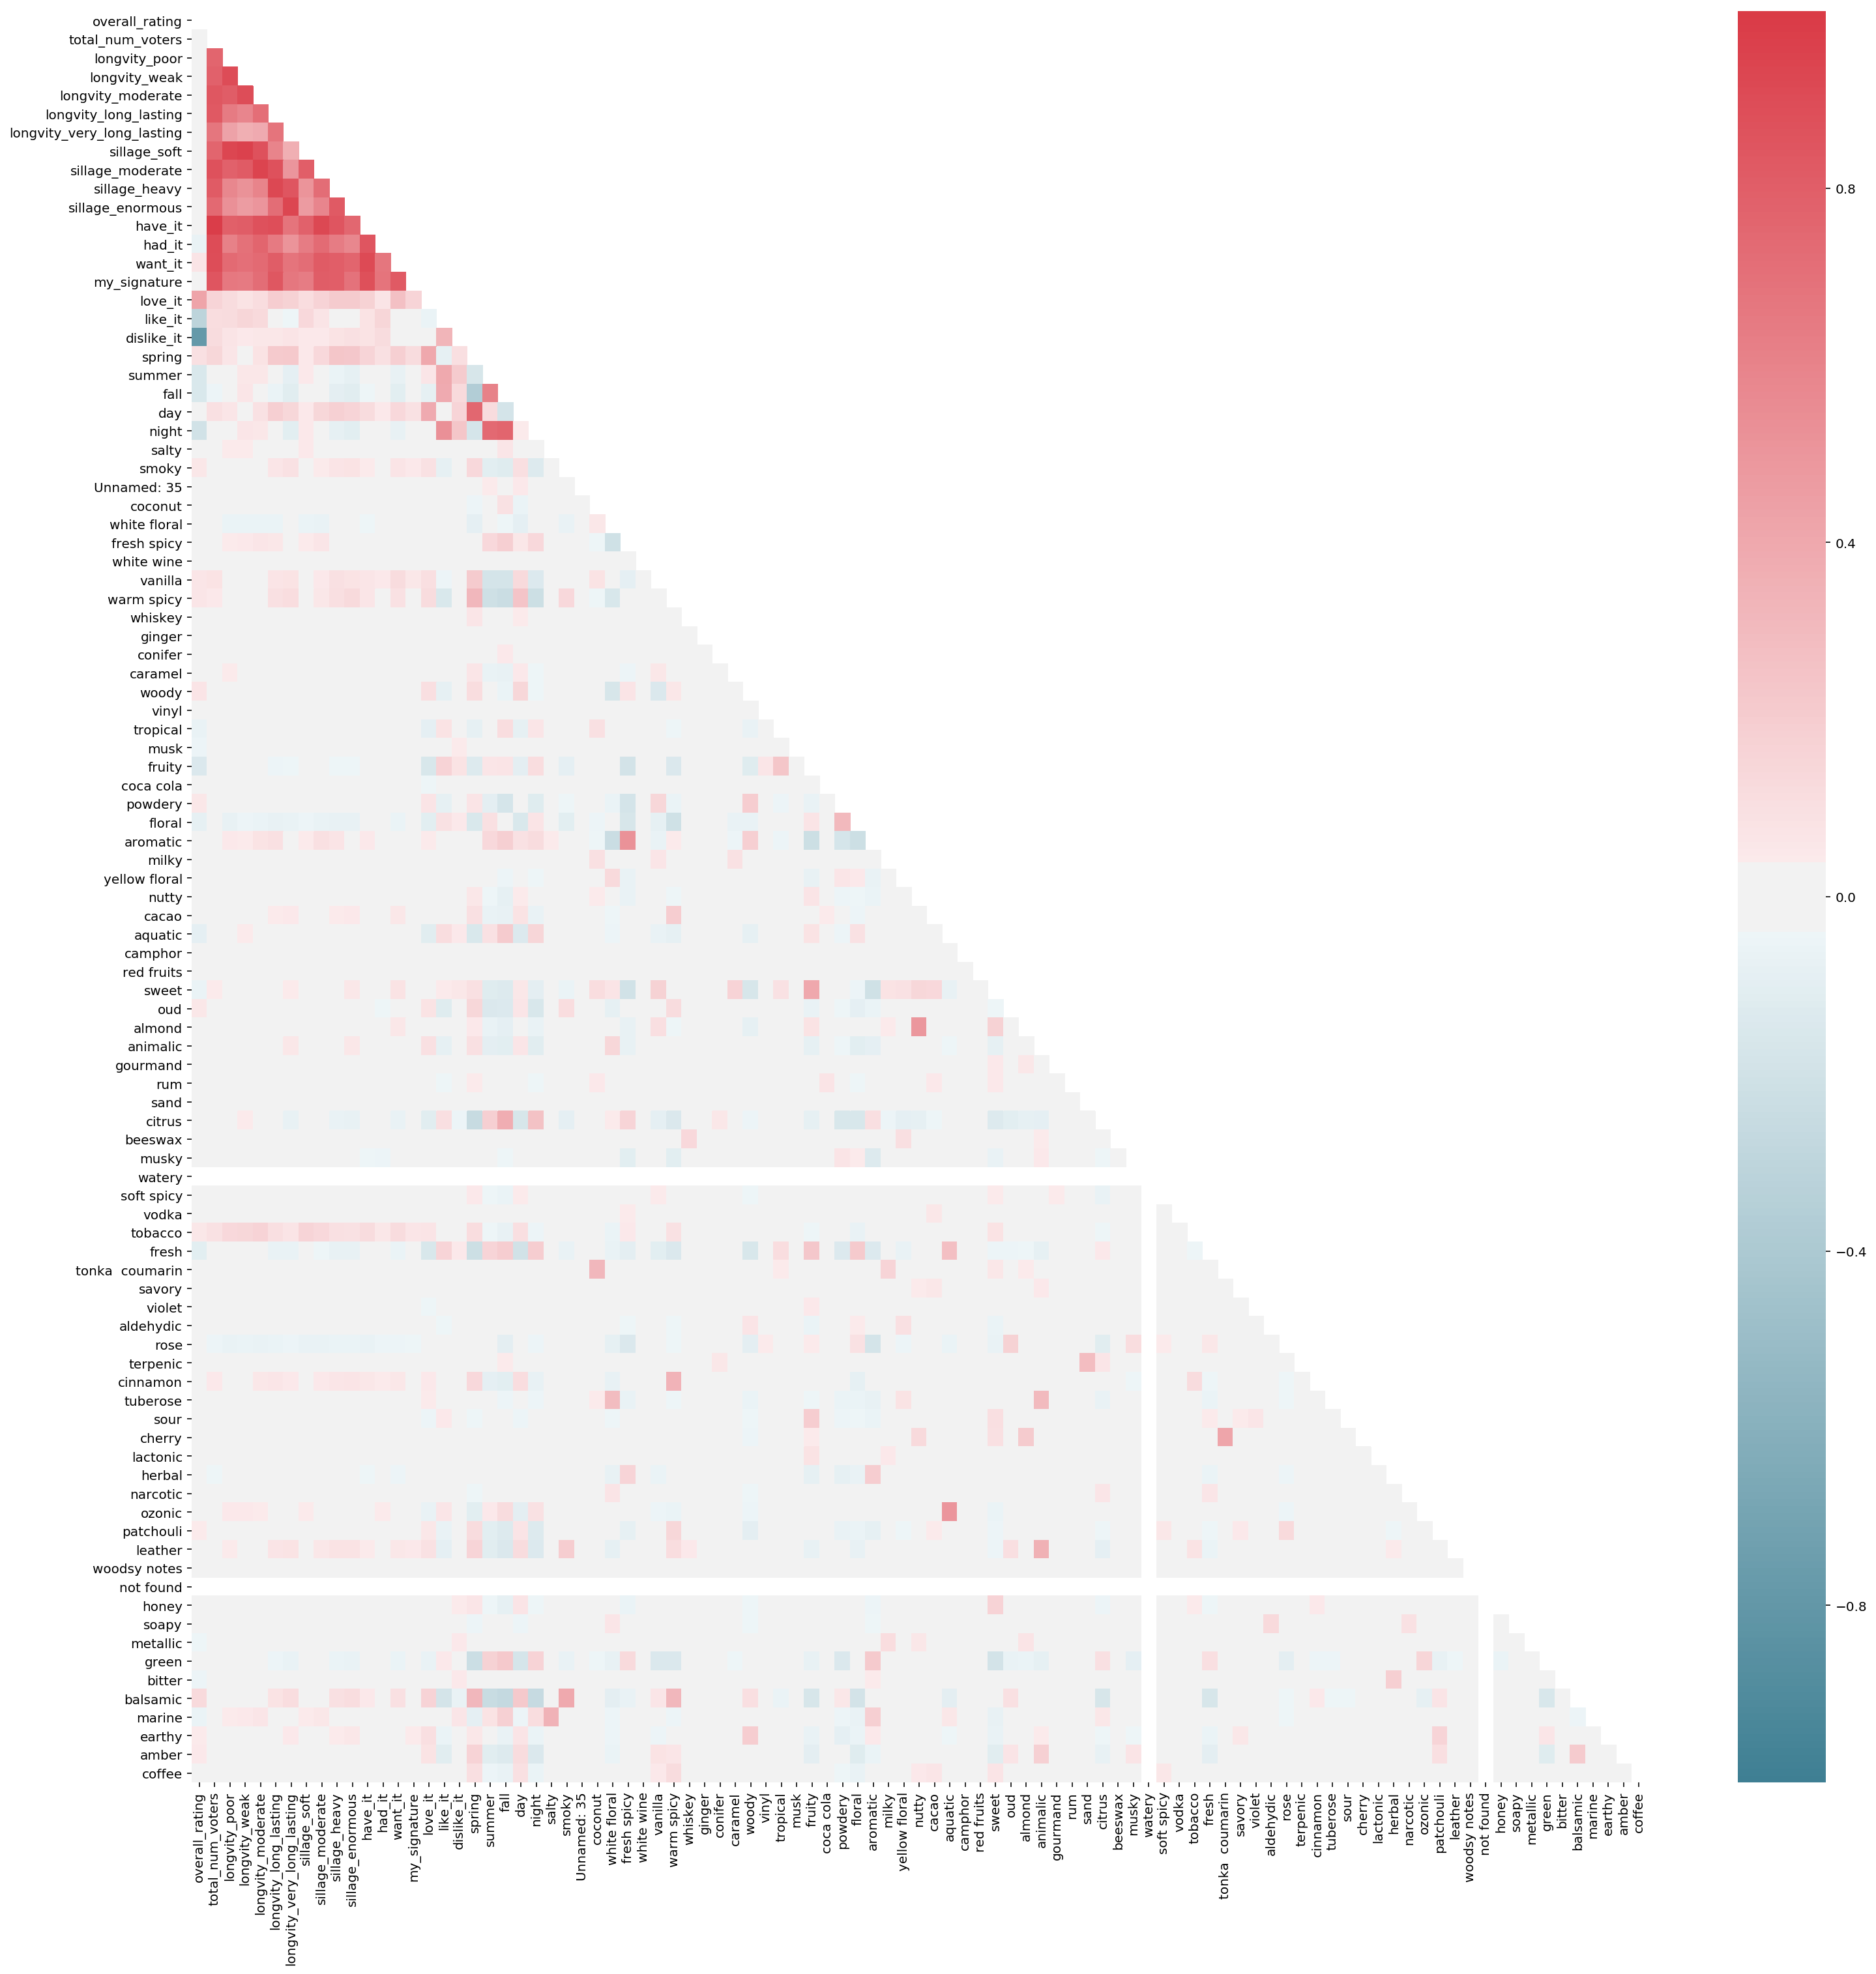

In [36]:
make_heat_map(df);

## <span style='color:navy'> Preparing for Modeling </span>

In [118]:
# dummify all string variables, which are: 'perfume_name', 'designer', 'group', 'gender'
# I will assign a perfume id instead of a name
def make_dummies(df):
    """
    Adds dummies of 'designer', 'group', 'gender' to the dataframe, and drops original ones.
    Apply to both train_df and test_df
    """
    # get dummies 
    dummies = pd.get_dummies(df[['designer', 'group', 'gender']])
    
    # add them to the dataframe
    new_df = pd.concat([df, dummies], axis = 1, sort = False)
    
    # add a quick perfume_id instead of perfume_name
    new_df['perfume_id'] = df.index 
    new_df.drop(['all_notes','top_notes', 'middle_notes','base_notes', 'synopsis', 'main_accords', 'perfume_name',
                'designer', 'group', 'gender'], axis = 1, inplace = True)
    
    return new_df

In [119]:
train_df = make_dummies(df)

In [121]:
test_df = make_dummies(test_df)

In [125]:
train_df.head(2)

,overall_rating,total_num_voters,longvity_poor,longvity_weak,longvity_moderate,longvity_long_lasting,longvity_very_long_lasting,sillage_soft,sillage_moderate,sillage_heavy,sillage_enormous,have_it,had_it,want_it,my_signature,love_it,like_it,dislike_it,spring,summer,fall,day,night,salty,smoky,Unnamed: 35,coconut,white floral,fresh spicy,white wine,vanilla,warm spicy,whiskey,ginger,conifer,caramel,woody,vinyl,tropical,musk,fruity,coca cola,powdery,floral,aromatic,milky,yellow floral,nutty,cacao,aquatic,camphor,red fruits,sweet,oud,almond,...,designer_Lacoste Fragrances,designer_Lancome,designer_Marc Jacobs,designer_Narciso Rodriguez,designer_Nina Ricci,designer_Paco Rabanne,designer_Prada,designer_Ralph Lauren,designer_Salvador Dali,designer_Serge Lutens,designer_Tom Ford,designer_Valentino,designer_Van Cleef & Arpels,designer_Versace,designer_Viktor&Rolf,designer_Yves Rocher,designer_Yves Saint Laurent,group_Aromatic,group_Aromatic Aquatic,group_Aromatic Fougere,group_Aromatic Fruity,group_Aromatic Green,group_Aromatic Spicy,group_Chypre,group_Chypre Floral,group_Chypre Fruity,group_Citrus,group_Citrus Aromatic,group_Citrus Gourmand,group_Floral,group_Floral Aldehyde,group_Floral Aquatic,group_Floral Fruity,group_Floral Fruity Gourmand,group_Floral Green,group_Floral Woody Musk,group_Leather,group_Oriental,group_Oriental Floral,group_Oriental Fougere,group_Oriental Spicy,group_Oriental Vanilla,group_Oriental Woody,group_Woody,group_Woody Aquatic,group_Woody Aromatic,group_Woody Chypre,group_Woody Floral Musk,group_Woody Spicy,group_not found,gender_men,gender_unknown,gender_women,gender_women and men,perfume_id
0,4.11,410.0,14,25,35,14,12,47,34,20,31,279,40,272,3,100,74,26,3,20,54,5,56,0.0,0.0,0.0,80.0,119.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,3.94,2311.0,33,39,173,402,97,87,285,366,111,2021,638,1252,64,100,70,37,55,41,12,58,41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


***
## <span style='color:navy'> Modeling </span>

In [183]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import RidgeCV, LassoCV, LinearRegression, ElasticNetCV, LassoLarsCV
from sklearn.feature_selection import SelectKBest, RFECV

In [127]:
X = train_df.drop(['overall_rating'], axis = 1)
y = train_df['overall_rating']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 62019)

In [210]:
def run_model(model, X_train = X_train, X_test = X_test):
    
    """
    Returns cross-validation score for quick testing.
    Need to run train/test/split beforehand. 
    Need to import the models beforehand. 
    
    Parameters:
    -----------
    model: the name of the model, as you'd use it outside the function, without parentheses.
    X_train & X_test: from the previously ran train/test/split
    """
    
    # standarizing the train and test data frames
    ss = StandardScaler()
    X_train_sc = ss.fit_transform(X_train)
    X_test_sc = ss.transform(X_test)
    
    # instantiating, and fitting the model
    model = model() 
    model.fit(X_train_sc, y_train)
    
    # running cross-val
    score = cross_val_score(model, X_test_sc, y_test, cv = 5).mean()
    
    print(f'scored {round(score, 3)} on holdout set')
    return score

In [144]:
import warnings
warnings.filterwarnings('ignore') # to avoid the long list of warnings printouts

In [211]:
model_list = [LinearRegression, RidgeCV, LassoCV, ElasticNetCV, LassoLarsCV]

for m in model_list:
    print(m)
    run_model(m)
    print('-----------')

<class 'sklearn.linear_model.base.LinearRegression'>
scored -3.09814631428661e+24 on holdout set
-----------
<class 'sklearn.linear_model.ridge.RidgeCV'>
scored 0.72 on holdout set
-----------
<class 'sklearn.linear_model.coordinate_descent.LassoCV'>
scored 0.762 on holdout set
-----------
<class 'sklearn.linear_model.coordinate_descent.ElasticNetCV'>
scored 0.76 on holdout set
-----------
<class 'sklearn.linear_model.least_angle.LassoLarsCV'>
scored 0.762 on holdout set
-----------


<span style='color:navy'> This tells us, without tuning parameters, that we might want to focus on Lasso model and tune that </span>

In [170]:
k_best = SelectKBest() # select best k features to include in the model
ss = StandardScaler()
lasso = LassoCV()

pipline = Pipeline([
    ('k_best' , k_best),
    ('ss' , ss),
    ('lasso' , lasso)
])

params = {
    'k_best__k' : [100, 170],
    'lasso__eps' : [0.05, 0.001, 0.5],
    'lasso__n_alphas': [500, 250, 100]
}

In [171]:
gs = GridSearchCV(pipline, param_grid=params, iid=True, cv = 5)

In [172]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('k_best', SelectKBest(k=100, score_func=<function f_classif at 0x11d5fb268>)), ('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lasso', LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=None,
       param_grid={'k_best__k': [100, 170], 'lasso__eps': [0.05, 0.001, 0.5], 'lasso__n_alphas': [500, 250, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [196]:
gs.best_params_

{'k_best__k': 170, 'lasso__eps': 0.001, 'lasso__n_alphas': 100}

<span style='color:navy'> It returned that best parameters are the default ones for LASSO; and of course more features is better. <br />
No ground breaking revelations here, this step didn't lead to significant enhancements of the model.
</span> 

In [197]:
round(gs.score(X_test, y_test), 3)

0.765

### <span style='color:navy'> Polynomial Features </span>
<span style='color:navy'> I suspect there could be an effect for two features interacting together, on the target variable, or there's a non-linear relationship between some features and the target. I am going to test for that next. <br /> 
P.S. I could make degree = 3 or more, but that means 2 and 3 interactions, with 2nd and 3rd powers for every feature, that will result in an enormous data frame. </span>

In [201]:
polynom = PolynomialFeatures(degree  = 2, interaction_only = True)
k_best = SelectKBest(k = 200)
ss = StandardScaler()
lasso = LassoCV()

pipline = Pipeline([
    ('polynomial' , polynom),
    ('k_best' , k_best),
    ('ss' , ss),
    ('lasso', lasso)
])

params = {
    'polynomial__interaction_only': [True, False],
    'k_best__k' : [100, 200],
    'lasso__eps' : [0.05, 0.001, 0.5],
    'lasso__n_alphas': [500, 250, 100]
}

In [202]:
gs = GridSearchCV(pipline, param_grid=params, iid=True, cv = 5)

In [203]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('polynomial', PolynomialFeatures(degree=2, include_bias=True, interaction_only=True)), ('k_best', SelectKBest(k=200, score_func=<function f_classif at 0x11d5fb268>)), ('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lasso', LassoCV(alph...e=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=None,
       param_grid={'polynomial__interaction_only': [True, False], 'k_best__k': [100, 200], 'lasso__eps': [0.05, 0.001, 0.5], 'lasso__n_alphas': [500, 250, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [204]:
gs.best_params_

{'k_best__k': 200,
 'lasso__eps': 0.001,
 'lasso__n_alphas': 250,
 'polynomial__interaction_only': False}

In [205]:
round(gs.score(X_test, y_test), 3)

0.803

<span style='color:navy'> Based on increase of model performance by $\approx 4%$, there's interaction terms and/or non-linear (squared) relationship between features and target variable. <br /> 
I am going to use this information to build the huge new training and holdout set, with the polynomial features, then use PCA on the new dataframe. <br />
I have used only 200 features in the dataframe with the added polynomial features and interaction terms, we probably will get better accuracy including more features.
</span>

In [208]:
# building the new data frame with the polynomial features and interaction terms
X_train_poly = polynom.fit_transform(X_train)
X_test_poly = polynom.transform(X_test)

In [209]:
X_train_poly.shape

(3333, 15932)

<span style='color:navy'> Now that we have far more features than observations, we can use the LARS (Least Angle Regression) to test it out. i.e. LassoLars </span>

In [212]:
run_model(LassoLarsCV, X_train=X_train_poly, X_test= X_test_poly)

scored 0.748 on holdout set


0.7475847404576121

<span style='color:navy'> Ok, that didn't do well. <br />
It is worth noting here that in terms of reducing dimensionality thus far, Lasso takes care of it, as it drops insignificat features on its own, by driving their coefficients to zero, that is its chracteristic. Unlike Ridge which will make the effect of such features small, but won't drop them out of the model completely, by driving the coefficients of insignificant features close to zero, but not zero.
</span>

In [213]:
# to prove that we do need the LassoLars in case of features > observations
run_model(LassoCV, X_train=X_train_poly, X_test= X_test_poly)

scored 0.277 on holdout set


0.2770090094271434

### <span style='color:navy'> PCA </span> 
<span style='color:navy'> There is multicollinearity in the data frame. i.e. serveral features have high correlations between each other. Principal Component Analysis should solve this issue. Also, and equally important, this is a great way to reduce dimensionality </span>

In [207]:
from sklearn.decomposition import PCA

In [264]:
pca = PCA(random_state = 62019)
# n_components='mle' is only supported if n_samples >= n_features, so we can't use that. Trying with none first then
# with 100
ss = StandardScaler()
lasso = LassoCV()

In [265]:
pipline = Pipeline([
    ('ss', ss),
    ('pca', pca),
    ('lasso', lasso)
])

params = {
    'pca__n_components' : [50, 100, 1000],
    'lasso__eps' : [0.05, 0.001, 0.5],
    'lasso__n_alphas': [500, 250, 100]
}

In [266]:
gs = GridSearchCV(pipline, param_grid=params, iid=True, cv = 5)

In [267]:
gs.fit(X_train_poly, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=62019,
  svd_solver='auto', tol=0.0, whiten=False)), ('lasso', LassoCV(alphas=None, copy_X=True, cv='warn', eps=...e=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=None,
       param_grid={'pca__n_components': [50, 100, 1000], 'lasso__eps': [0.05, 0.001, 0.5], 'lasso__n_alphas': [500, 250, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [268]:
gs.best_params_

{'lasso__eps': 0.001, 'lasso__n_alphas': 250, 'pca__n_components': 1000}

In [270]:
round(gs.score(X_test_poly, y_test), 3) 
# note: w/o GridSearching, the pipeline with n_components = 1000 for PCA, scored 0.60%

0.599

<span style='color:navy'> Here is what we have so far: <br />
    PCA didn't do well, in fact it did the worst, maybe there isn't enough multicollinearity between the features. Seeing the explained variace ratio for the first 10 components hinted me that PCA probably won't help.
    <br />
   The best model we have so far is <br />
    </span>
    ``{'k_best__k': 200,
 'lasso__eps': 0.001,
 'lasso__n_alphas': 250,
 'polynomial__interaction_only': False}`` 
 
 <span style='color:navy'> I might get even better results if I used all the features; or I might not if the model is overfitting. </span>

In [273]:
# # you can see the first 10 components' explained variance ratio with this command
# pca.explained_variance_ratio_[:10] # works only when using n_componenets when instantiating pca

<span style='color:navy'> Testing my theory, by using more features on the best performing model I was able to get </span>

In [276]:
polynom = PolynomialFeatures(degree  = 2, interaction_only = False)
k_best = SelectKBest()
ss = StandardScaler()
lasso = LassoCV(n_alphas=250)

pipline = Pipeline([
    ('polynomial' , polynom),
    ('k_best' , k_best),
    ('ss' , ss),
    ('lasso', lasso)
])

params = {
#     'polynomial__interaction_only': [True, False],
    'k_best__k' : [200, 500, 1000],
#     'lasso__eps' : [0.05, 0.001, 0.5],
#     'lasso__n_alphas': [500, 250, 100]
}

In [277]:
gs = GridSearchCV(pipline, param_grid=params, iid=True, cv = 5)

In [278]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('polynomial', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('k_best', SelectKBest(k=10, score_func=<function f_classif at 0x11d5fb268>)), ('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lasso', LassoCV(alph...e=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=None,
       param_grid={'k_best__k': [200, 500, 1000]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [279]:
round(gs.score(X_test, y_test), 3) 

0.803

In [280]:
gs.best_params_

{'k_best__k': 200}

<span style='color:navy'> Nice. Now we know the model will overfit with more than 200 features to use out of the ones we have, with interaction terms and polynomial features, using Lasso</span>

***
<span style='color:navy'> Note: <br /> 
    Dimensionality reduction using Linear Discriminant Analysis won't work here, because it is a classifier that only makes sense in multi-class classification problems. See sklearn docs about that [section 1.2.1](https://scikit-learn.org/stable/modules/lda_qda.html). <br />
    I used X_train_poly, becasue an improvement of 4% in model means there are interactions/polynomial correlation.
</span>


<span style='color:navy'> **Next Steps** <br />
    I will do Cluster Analysis to further explore the data; and build a Neural Network model to see if I can get better predictions, in separate notebooks </span>